In [18]:
import pandas as pd
import json
import numpy as np
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set_theme()

In [123]:
df = pd.read_csv('../data/dummy.csv', sep=',', dtype = np.float32)
turb_coords = df.to_numpy(dtype = np.float32)
turb_coords.shape

(2, 2)

In [110]:
powerCurve = pd.read_csv('../data/power_curve.csv', sep=',', dtype = np.float32)
powerCurve = powerCurve.to_numpy(dtype = np.float32)
powerCurve.shape

(501, 3)

In [4]:
def wind_rose(wr):
    wd = wr[:,0]
    ws = wr[:,1]
    ax = WindroseAxes.from_ax()
    ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    
def bar_chart(wr):
    wd = wr[:,0]
    ws = wr[:,1]

    ax.bar(wd, ws, normed=True, nsector=16)
    table = ax._info['table']
    wd_freq = np.sum(table, axis=0)

    direction = ax._info['dir']
    print(direction)
    plt.bar(np.arange(16), wd_freq, align='center')
    xlabels = ('N','','N-E','','E','','S-E','','S','','S-W','','W','','N-W','')
    xticks=range(16)
    plt.gca().set_xticks(xticks)
    plt.draw()
    plt.gca().set_xticklabels(xlabels)
    plt.draw()

# def speed_pdf(wr):
#     wd = wr[:,0]
#     ws = wr[:,1]    
#     ax = WindroseAxes.from_ax()
#     bins = np.arange(0, 6 + 1, 0.5)
#     bins = bins[1:]
#     ax, params = ax.pdf(ws, bins=bins)

[348.75, 11.25, 33.75, 56.25, 78.75, 101.25, 123.75, 146.25, 168.75, 191.25, 213.75, 236.25, 258.75, 281.25, 303.75, 326.25]


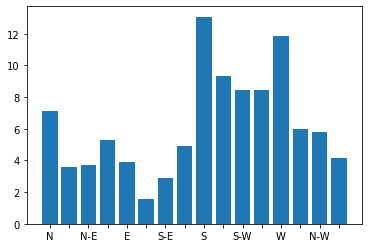

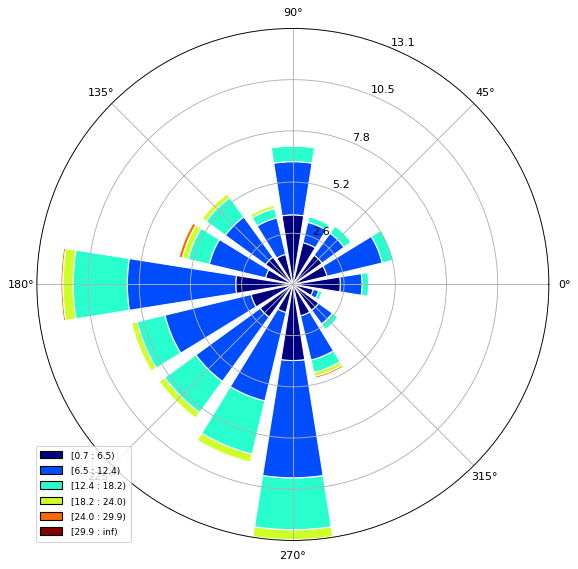

In [64]:
df = pd.read_csv('../data/WindData/wind_data_2007.csv')
wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
bar_chart(wind_resource)
# speed_pdf(wind_resource)
wind_rose(wind_resource)

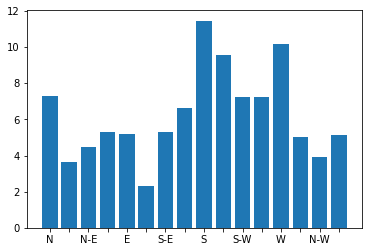

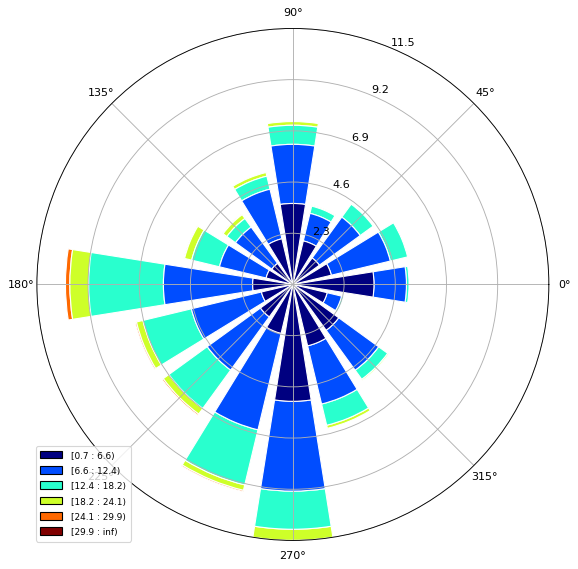

In [52]:
df = pd.read_csv('../data/WindData/wind_data_2008.csv')
wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
bar_chart(wind_resource)
wind_rose(wind_resource)


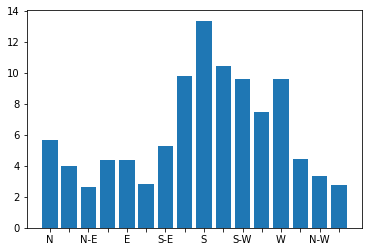

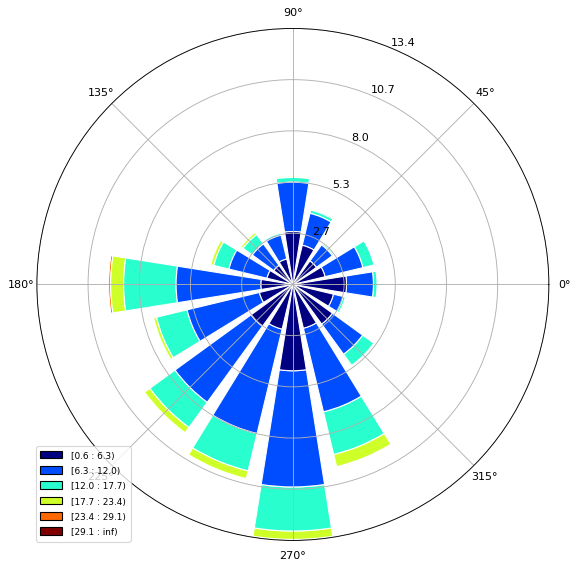

In [53]:
df = pd.read_csv('../data/WindData/wind_data_2009.csv')
wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
bar_chart(wind_resource)
wind_rose(wind_resource)

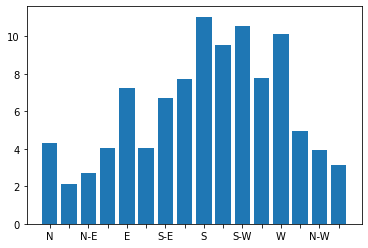

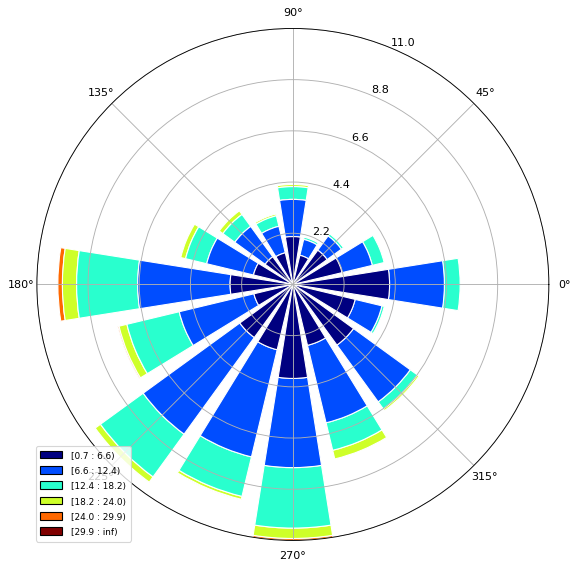

In [54]:
df = pd.read_csv('../data/WindData/wind_data_2013.csv')
wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
bar_chart(wind_resource)
wind_rose(wind_resource)

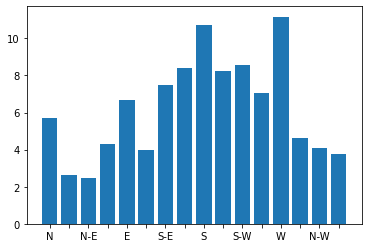

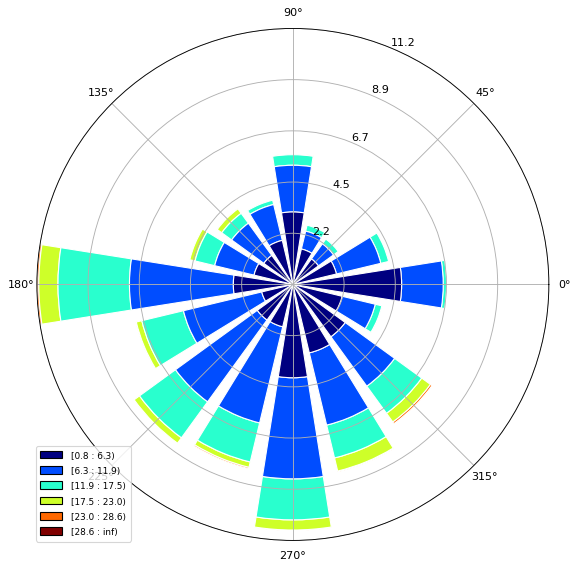

In [55]:
df = pd.read_csv('../data/WindData/wind_data_2014.csv')
wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
bar_chart(wind_resource)
wind_rose(wind_resource)

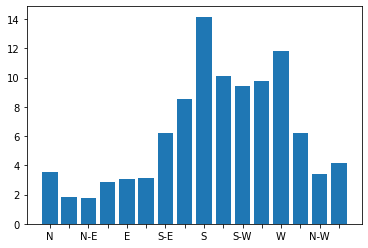

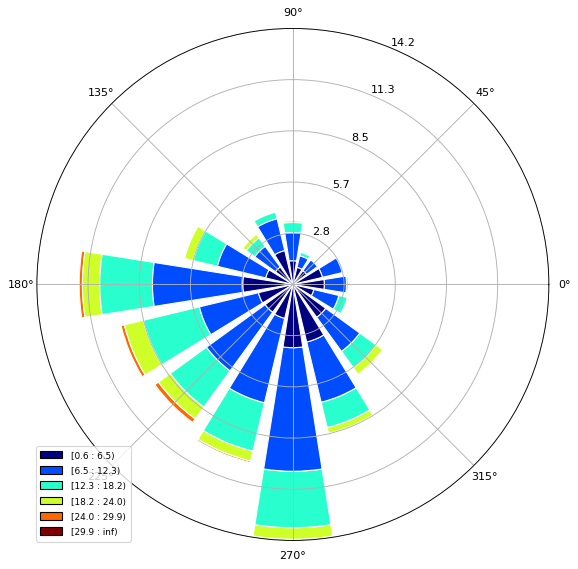

In [56]:
df = pd.read_csv('../data/WindData/wind_data_2015.csv')
wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
bar_chart(wind_resource)
wind_rose(wind_resource)

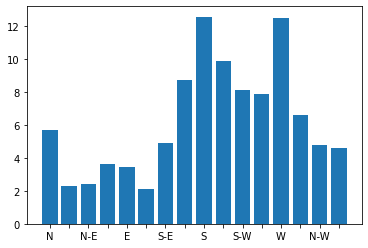

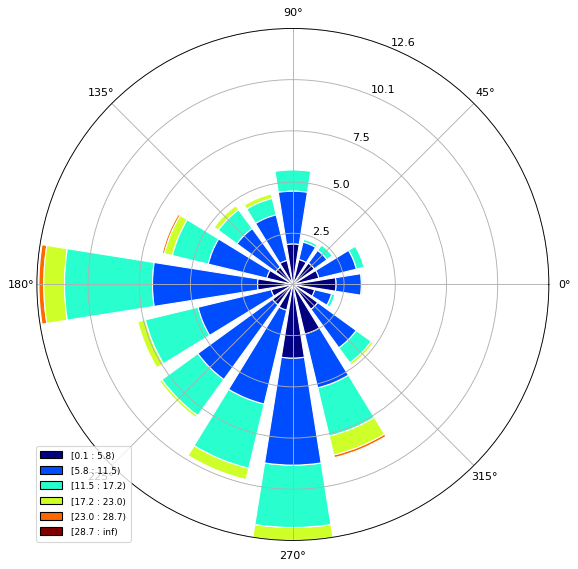

In [57]:
df = pd.read_csv('../data/WindData/wind_data_2017.csv')
wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)
bar_chart(wind_resource)
wind_rose(wind_resource)

In [111]:
def binWindResourceData(wind_data_file_name):
    r"""
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Loads the wind data. Returns a 2D array with shape (36,15). 
    Each cell in  array is a wind direction and speed 'instance'. 
    Values in a cell correspond to probability of instance
    occurence.  
    
    :Called from
        main function
        
    :param
        wind_data_file_name - Wind Resource csv file  
        
    :return
        1-D flattened array of the 2-D array shown below. Values 
        inside cells, rough probabilities of wind instance occurence. 
        Along: Row-direction (drct), Column-Speed (s). Array flattened
        for vectorization purpose. 
        
                      |0<=s<2|2<=s<4| ...  |26<=s<28|28<=s<30|
        |_____________|______|______|______|________|________|
        | drct = 360  |  --  |  --  |  --  |   --   |   --   |
        | drct = 10   |  --  |  --  |  --  |   --   |   --   |
        | drct = 20   |  --  |  --  |  --  |   --   |   --   |
        |   ....      |  --  |  --  |  --  |   --   |   --   |
        | drct = 340  |  --  |  --  |  --  |   --   |   --   |
        | drct = 350  |  --  |  --  |  --  |   --   |   --   |        
    """
    
    # Load wind data. Then, extracts the 'drct', 'sped' columns
    # df = pd.read_csv(wind_data_file_name)
    # wind_resource = df[['drct', 'sped']].to_numpy(dtype = np.float32)

    f = open(wind_data_file_name,'r').readlines()
    l = []
    for line in f[1:]:
        line = line.strip().split(',')
        l.append([])
        l[-1].extend([float(line[1]),float(line[2])])
    wind_resource = np.array(l,dtype = np.float32)

    # direction 'slices' in degrees
    slices_drct   = np.roll(np.arange(10, 361, 10, dtype=np.float32), 1)
    ## slices_drct   = [360, 10.0, 20.0.......340, 350]
    n_slices_drct = slices_drct.shape[0]
    
    # speed 'slices'
    slices_sped   = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 
                        18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0]
    n_slices_sped = len(slices_sped)-1

    
    # placeholder for binned wind
    binned_wind = np.zeros((n_slices_drct, n_slices_sped), 
                           dtype = np.float32)
    
    # 'trap' data points inside the bins. 
    for i in range(n_slices_drct):
        for j in range(n_slices_sped):     
            
            # because we already have drct in the multiples of 10
            foo = wind_resource[(wind_resource[:,0] == slices_drct[i])] 

            foo = foo[(foo[:,1] >= slices_sped[j]) 
                          & (foo[:,1] <  slices_sped[j+1])]
            
            binned_wind[i,j] = foo.shape[0]  
    
    wind_inst_freq   = binned_wind/np.sum(binned_wind)
    wind_inst_freq   = wind_inst_freq.ravel()
    
    return(wind_inst_freq)

In [150]:
def searchSorted(lookup, sample_array):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Returns lookup indices for closest values w.r.t sample_array elements
    
    :called_from
        preProcessing, getAEP
    
    :param
        lookup       - The lookup array
        sample_array - Array, whose elements need to be matched
                       against lookup elements. 
        
    :return
        lookup indices for closest values w.r.t sample_array elements 
    """
    lookup_middles = lookup[1:] - np.diff(lookup.astype('f'))/2
    idx1 = np.searchsorted(lookup_middles, sample_array)
    indices = np.arange(lookup.shape[0])[idx1]
    return indices

def preProcessing(power_curve, t_zones, n_turbs):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Doing preprocessing to avoid the same repeating calculations.
    Record the required data for calculations. Do that once.
    Data are set up (shaped) to assist vectorization. Used later in
    function totalAEP. 
    
    :called_from
        main function
    
    :param
        power_curve - 2D numpy array with cols Wind Speed (m/s), 
                      Thrust Coeffecient (non dimensional), Power (MW)
        
    :return
        n_wind_instances  - number of wind instances (int)
        cos_dir           - For coordinate transformation 
                            2D Array. Shape (n_wind_instances,1)
        sin_dir           - For coordinate transformation 
                            2D Array. Shape (n_wind_instances,1)
        wind_sped_stacked - column staked all speed instances n_turb times. 
        C_t               - 3D array with shape (n_wind_instances, n_turbs, n_turbs)
                            Value changing only along axis=0. C_t, thrust coeff.
                            values for all speed instances. 
    """
    # number of turbines
#     n_turbs       =   2
    
    # direction 'slices' in degrees
    slices_drct   = np.roll(np.arange(10, 361, 10, dtype=np.float32), 1)
    ## slices_drct   = [360, 10.0, 20.0.......340, 350]
    n_slices_drct = slices_drct.shape[0]
    
    # speed 'slices'
    slices_sped   = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 
                        18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0]
    n_slices_sped = len(slices_sped)-1
    
    # number of wind instances
    n_wind_instances = (n_slices_drct)*(n_slices_sped)
    
    # Create wind instances. There are two columns in the wind instance array
    # First Column - Wind Speed. Second Column - Wind Direction
    # Shape of wind_instances (n_wind_instances,2). 
    # Values [1.,360.],[3.,360.],[5.,360.]...[25.,350.],[27.,350.],29.,350.]
    wind_instances = np.zeros((n_wind_instances,2), dtype=np.float32)
    counter = 0
    for i in range(n_slices_drct):
        for j in range(n_slices_sped): 
            
            wind_drct =  slices_drct[i]
            wind_sped = (slices_sped[j] + slices_sped[j+1])/2
            
            wind_instances[counter,0] = wind_sped
            wind_instances[counter,1] = wind_drct
            counter += 1

    # So that the wind flow direction aligns with the +ve x-axis.			
    # Convert inflow wind direction from degrees to radians
    wind_drcts =  np.radians(wind_instances[:,1] - 90)
    # For coordinate transformation 
    cos_dir = np.cos(wind_drcts).reshape(n_wind_instances,1)
    sin_dir = np.sin(wind_drcts).reshape(n_wind_instances,1)
    
    # create copies of n_wind_instances wind speeds from wind_instances
    wind_sped_stacked = np.column_stack([wind_instances[:,0]]*t_zones)
   
    # Pre-prepare matrix with stored thrust coeffecient C_t values for 
    # n_wind_instances shape (n_wind_instances, n_turbs, n_turbs). 
    # Value changing only along axis=0. C_t, thrust coeff. values for all 
    # speed instances.
    # we use power_curve data as look up to estimate the thrust coeff.
    # of the turbine for the corresponding closest matching wind speed
    indices = searchSorted(power_curve[:,0], wind_instances[:,0])
    C_t     = power_curve[indices,1]
    # stacking and reshaping to assist vectorization
    C_t     = np.column_stack([C_t]*(n_turbs*t_zones))
    C_t     = C_t.reshape(n_wind_instances, t_zones, n_turbs)
    
    return(n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t)

In [191]:
df = pd.read_csv('../data/dummy.csv', sep=',', dtype = np.float32)
turb_coords = df.to_numpy(dtype = np.float32)
print(turb_coords.shape)

farm_size = 3900
delta = 100
t_zones = int((farm_size/delta + 1)*(farm_size/delta + 1))
n_turbs = turb_coords.shape[0]

# df = pd.read_csv('../data/WindData/wind_data_2007.csv')
wind_inst_freq = binWindResourceData('../data/WindData/wind_data_2007.csv')
turb_coords
farm_coords = np.mgrid[50:3955:delta, 50:3955:delta].reshape(2,-1).T
n_turbs = turb_coords.shape[0]
n_farms = farm_coords.shape[0]
n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t = preProcessing(powerCurve, t_zones, n_turbs)
turb_rad = 50

rotate_coords_t   =  np.zeros((n_wind_instances, n_turbs, 2), dtype=np.float32)
rotate_coords_t[:,:,0] =  np.matmul(cos_dir, np.transpose(turb_coords[:,0].reshape(n_turbs,1))) - \
                       np.matmul(sin_dir, np.transpose(turb_coords[:,1].reshape(n_turbs,1)))
rotate_coords_t[:,:,1] =  np.matmul(sin_dir, np.transpose(turb_coords[:,0].reshape(n_turbs,1))) +\
                       np.matmul(cos_dir, np.transpose(turb_coords[:,1].reshape(n_turbs,1)))

rotate_coords_f   =  np.zeros((n_wind_instances, n_farms, 2), dtype=np.float32)
rotate_coords_f[:,:,0] =  np.matmul(cos_dir, np.transpose(farm_coords[:,0].reshape(n_farms,1))) - \
                       np.matmul(sin_dir, np.transpose(farm_coords[:,1].reshape(n_farms,1)))
rotate_coords_f[:,:,1] =  np.matmul(sin_dir, np.transpose(farm_coords[:,0].reshape(n_farms,1))) +\
                       np.matmul(cos_dir, np.transpose(farm_coords[:,1].reshape(n_farms,1)))

tmprx = rotate_coords_t[:,:,0,np.newaxis]
tmpry = rotate_coords_t[:,:,1,np.newaxis]
tmpfx = rotate_coords_f[:,:,0,np.newaxis]
tmpfy = rotate_coords_f[:,:,1,np.newaxis]
x_dist = tmpfx - tmprx.transpose([0,2,1])
y_dist = np.abs(tmpfy - tmpry.transpose([0,2,1]))
sped_deficit = (1-np.sqrt(1-C_t))*((turb_rad/(turb_rad + 0.05*x_dist))**2) 
sped_deficit[((x_dist <= 0.1) | ((x_dist > 0) & (y_dist > (turb_rad + 0.05*x_dist))))] = 0.0
# print(x_dist[:,39])
# print(sped_deficit[:,39])
sped_deficit_eff  = np.sqrt(np.sum(np.square(sped_deficit), axis = 2))
# print(sped_deficit_eff[:,0])
wind_sped_eff = wind_sped_stacked*(1.0-sped_deficit_eff)

indices = searchSorted(powerCurve[:,0], wind_sped_eff.ravel())
power   = powerCurve[indices,2]
power   = power.reshape(n_wind_instances,t_zones)

wind_sped_eff.shape

(5, 2)


/mnt/f/books_and_papers/Iit/5th_Year/ShellAI_Hackathon/shell-windfarm-ai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/mnt/f/books_and_papers/Iit/5th_Year/ShellAI_Hackathon/shell-windfarm-ai/venv/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in multiply


(540, 1600)

[[1.3087767 1.2272385 1.2734417 ... 1.2324497 1.1210629 1.3098125]
 [1.2447671 1.2603207 1.283793  ... 1.2743473 1.2791231 1.2471075]
 [1.290367  1.2623144 1.2920552 ... 1.2997954 1.2989553 1.2927074]
 ...
 [1.2394345 1.2559547 1.281784  ... 1.265762  1.2318919 1.2403454]
 [1.1269616 1.2453029 1.2739666 ... 1.2268612 1.1969903 1.1278723]
 [1.309855  1.2309906 1.2771938 ... 1.2345047 1.1231178 1.3108907]]


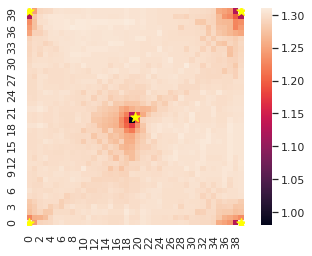

In [192]:
# a = np.random.random((4, 4))
# a = np.average(power.transpose(), axis=1).reshape(int(farm_size/delta + 1),int(farm_size/delta + 1))
# a = power.transpose()[:,200].reshape(int(farm_size/delta + 1),int(farm_size/delta + 1))
a = np.matmul(power.transpose(),wind_inst_freq).reshape(int(farm_size/delta + 1),int(farm_size/delta + 1))
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

# idx_min_big = turb_coords.flatten().argmin()
# x_min_big, y_min_big = (idx_min_big % 100) / 10 , 10 - (idx_min_big // 100) / 10

# get min of new_thick_df
# min_idx = a.flatten().argmin()
# x_min, y_min = min_idx % 10 + .5, 9 - min_idx // 10 + .5
# ax.scatter(x_min, y_min, marker='*', s=100, color='yellow') 
print(a)
a = a.T
sns.heatmap(a, linewidth=0, square=True, ax=ax)
ax.scatter(turb_coords[:,0]/delta,turb_coords[:,1]/delta, marker='*', s=100, color='yellow') 
# yticks = np.linspace(0,38,39)
# ax.set_yticklabels(ax.get_yticklabels()[::-1])
# plt.imshow(a, cmap='hot')
ax.invert_yaxis()
plt.show()